# U.S. Medical Insurance Costs

You work as a data scientist for an insurance company and need to provide your boss some clarity on which factors affect people's charges or insurance costs. Your analysis is key to infrom strategical business and clinical decisions.

## Instructions

1) Create folder in which you create your jupyter notebook

2) Name your folder AI683_Fall2023_FIRSTNAME_LASTNAME

2) Place in that folder the .csv dataset you can find on brightspace

3) Perform the guided small project by following the instrcutions in each cells. make sure to keep the cell structure displaying results for each tasks.

4) Upon Completion, Upload the ENTIRE FOLDER ('.csv' + Jupyter Notebook) to brightspace in the assignement section


## Debugging Tips

Feeling stuck? Try the following:

1) Google your question: oftentimes, someone has had the same question as you! Check out websites like StackOverflow, Dev.to, Statology or https://www.geeksforgeeks.org/ to see how other folks have found solutions.

2) Read the documentation: make sure to carefully read through the documentation for any libraries that you are using. Oftentimes they’ll have examples of what you’re looking for!

In [5]:
# Load Librairies
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as sms
import statsmodels.graphics.gofplots as smg
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices

In [6]:
# 2) Load the all the data from insurance.csv in a datafram named df
df = pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


### Exploratory Analysis

In [9]:
# Perfom Exploratory Data Analysis
#         - Print the summary information of the dataframe using the describe method
#         - Print the head of the dataframe to get a visual of your data
df.describe()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Find out the average age of the patients in the dataset.    
average_age = df["age"].mean()
print(f"Average patients age: {average_age}")

Average patients age: 39.20702541106129


In [14]:
# Analyze where a majority of the individuals are from. Use the data visualization of your choise to 
# show the number of people per region
region_counts = df["region"].value_counts()
print(region_counts)
print(f"The majority of the individuals are {max(region_counts)}.")

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
The majority of the individuals are 364.


In [15]:
# Compute the average charges per region. tip: use groupby method
average_charges_per_region = df.groupby("region")["charges"].mean()
print(average_charges_per_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


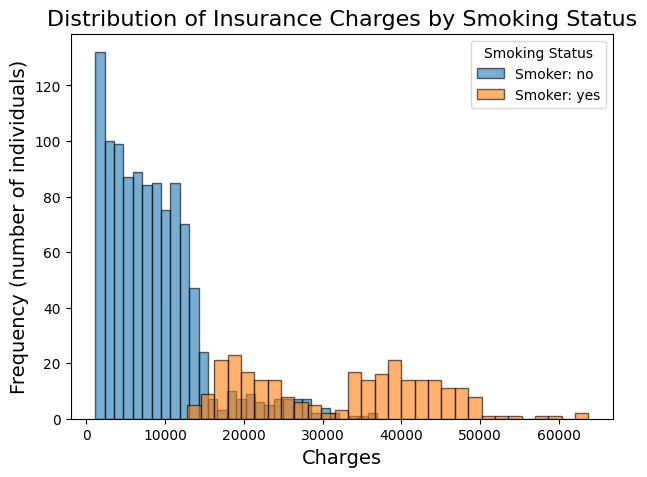

In [33]:
# plot distribution of Insurance Charges by smoking status 
# Tip use groupby method for pandas dataframe
# You will visually notice the difference in distribution shape based on wether the patient smoke or not
# this tickles your curiosity and decide to further explore this direction
plt.figure(figsize=(7, 5))
for label, group_data in df.groupby("smoker"):
    plt.hist(group_data["charges"], bins=30, alpha=0.6, label=f"Smoker: {label}", edgecolor="black")
    
    
plt.title("Distribution of Insurance Charges by Smoking Status", fontsize=16)
plt.xlabel("Charges", fontsize=14)
plt.ylabel("Frequency (number of individuals)", fontsize=14)
plt.legend(title="Smoking Status")
plt.show()

### Correlation

The following part of the project will be focused on assessing wich of the input variables {age,bmi,children} affect the predictor variable {charges}.

In [8]:
# Compute the correlation matrix for the dataset


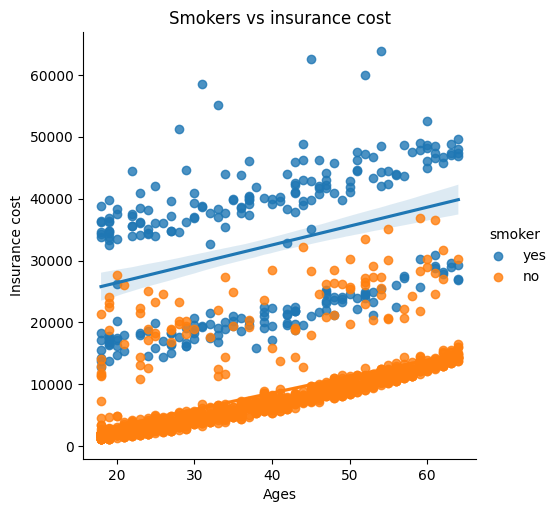

In [18]:
# Visually exploring the impact of smoking...there seems to be something interesting here! Let's dig deeper!

sns.lmplot(x="age", y="charges", hue="smoker", data = df)
plt.title('Smokers vs insurance cost')
plt.xlabel('Ages')
plt.ylabel('Insurance cost')
plt.show()

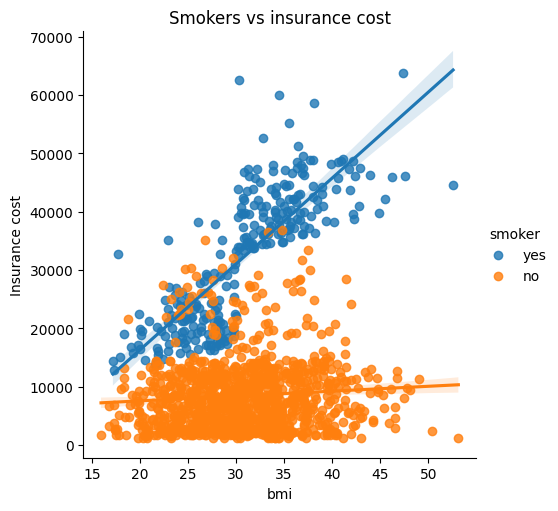

In [19]:
# Visually exploring the impact of smoking...there seems to be something interesting here! Let's dig deeper!

sns.lmplot(x="bmi", y="charges", hue="smoker", data = df)
plt.title('Smokers vs insurance cost')
plt.xlabel('bmi')
plt.ylabel('Insurance cost')
plt.show()

In [9]:
# Compute the correlation matrix for the dataset only for smokers


In [12]:
# Plot relationship of charges to each variable 

In [10]:
# Generates the linear regression model with Y={charges} and X1,2,3= {age,bmi,children}


In [13]:
# Next we need to check that the assumption of linearity, Homoscedasticity and normality are respected.


In [11]:
# Lastly check for normality with the QQ plot



In [14]:
# All 3 assumptions are valid, lets keep moving and check for multicolinearity
# Calculate the VIF for each X_i


In [ ]:
# Do you have multicolinearity to worry about here and why? type your answer in a print function, 50 words max.
print('')

In [16]:
# Now that we are confident that our mulitple linear regression is appropriate, look up in the MLR output the
# F statistic. The F-test will allow us to statistically significantly decide whether any of the predictors in 
# the model is significant.
# Compute the F-statistic, the associated p-value and type your answer whether or not reject Ho in a 
# print function, 50 words max.

# tip: Have a look at dir(model) to see available results outputted by the MLR.
# for attr in dir(model):
#     if not attr.startswith('_'):
#         print(attr)



In [ ]:
# tip
for attr in dir(model):
    if not attr.startswith('_'):
        print(attr)

In [17]:
# Because the correlation between children and charges was so low, you now want to use the t-test 
# to determine if the impact of children is significant on the charges
# Compute the t-statistic and associated p-value for children. Type your answer whether or not reject Ho in a 
# print function, 50 words max.

In [18]:
# Based on your results in the previouos cell Make a 3d scatter plot representing the data that you retain


In [19]:
# Generates a new linear regression model with Y={charges} and the predictors you retained X1,2

In [20]:
# prediction: use the new model you trained to make predictions from the predictor values below. 
# Return the predicted charges.


In [21]:
# Extract the Confidence and prediction intervals for apha= 0.05 of the b parameters for X1 and X2